# HOW TO RETRIEVE AND USE AVIATION COLOUR CODE (ACC) DATA

The data are available through the [GeoNet GitHub data repository](https://github.com/GeoNet/data/tree/main/main/aviation-colour-codes), and more information on the dataset can be found there.

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Data retrieval and basic graphing

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt

#for datetime functionality
import datetime as dt 

import warnings
warnings.simplefilter(action='ignore')

## &nbsp;2. Basic data retrieval and graphing

We will work with data from Whakaari White Island as there have been several recent changes and this provides material to better show how to use the data.

The dates and times of changes in VAL is provided in UTC which supports easy integration with other GeoNet data sets which also use UTC.

In [2]:
url = 'https://raw.githubusercontent.com/GeoNet/data/main/aviation-colour-codes/'

In [3]:
volcano = 'WhakaariWhiteIsland'
accfile = url+'ACC_'+volcano+'.csv'
acc = pd.read_csv(accfile)

In [4]:
acc.tail()

,PeriodStart UTC,PeriodEnd UTC,ACC
46,2024-12-22T21:20:00Z,2025-01-12T22:29:59Z,Yellow
47,2025-01-12T22:30:00Z,2025-02-10T22:59:59Z,Orange
48,2025-02-10T23:00:00Z,2025-02-24T01:29:59Z,Yellow
49,2025-02-24T01:30:00Z,2025-06-09T03:59:59Z,Orange
50,2025-06-09T04:00:00Z,9999-01-01T00:00:00Z,Yellow


#### Make ACC period end time suitable for datetime

The ACC data use `9999-01-01T00:00:00Z` as the end time of the current ACC, as is standard GeoNet practice. But this cannot be converted to a python datetime value, so we replace it with the current date/time.

In [5]:
nowutc = dt.datetime.now(dt.timezone.utc).strftime('%Y-%m-%dT%H:%M:%SZ')
acc.replace('9999-01-01T00:00:00Z', nowutc, inplace=True)
acc[['PeriodStart UTC','PeriodEnd UTC']] = acc[['PeriodStart UTC','PeriodEnd UTC']].apply(lambda x: pd.to_datetime(x,format='ISO8601'))

In [6]:
acc.tail()

,PeriodStart UTC,PeriodEnd UTC,ACC
46,2024-12-22 21:20:00+00:00,2025-01-12 22:29:59+00:00,Yellow
47,2025-01-12 22:30:00+00:00,2025-02-10 22:59:59+00:00,Orange
48,2025-02-10 23:00:00+00:00,2025-02-24 01:29:59+00:00,Yellow
49,2025-02-24 01:30:00+00:00,2025-06-09 03:59:59+00:00,Orange
50,2025-06-09 04:00:00+00:00,2025-07-09 00:07:32+00:00,Yellow


#### Map ACC to a number to make it easier to visualise

In [7]:
nummap = {'Green':0, 'Yellow':1, 'Orange':2, 'Red':3}
acc['ACCnum'] = acc['ACC'].map(nummap)

In [8]:
acc.head()

,PeriodStart UTC,PeriodEnd UTC,ACC,ACCnum
0,2009-08-03 00:00:00+00:00,2012-08-02 03:14:59+00:00,Green,0
1,2012-08-02 03:15:00+00:00,2012-08-06 05:29:59+00:00,Yellow,1
2,2012-08-06 05:30:00+00:00,2012-08-13 01:59:59+00:00,Orange,2
3,2012-08-13 02:00:00+00:00,2012-12-12 00:29:59+00:00,Yellow,1
4,2012-12-12 00:30:00+00:00,2013-01-07 00:59:59+00:00,Orange,2


#### Basic Data Plot Using
The data are plotted as a "steps". As ACC values are assigned to a time interval, we have to plot `PeriodStart UTC` and `PeriodEnd UTC` to get the complete data, but with different steps. You can find an example of plotting these data as a line graph in a [data blog on the VAL dataset](https://www.geonet.org.nz/news/3fN5Mbo0RFkS8Bm0CmYcSl).

As ACC varies from green to red, which we mapped to 0 - 3, we fix the y-axis to the range -0.5 - 3.5. We apply blocks of colour to the graph to illustrate the ACC so we do not have to label the values.

Text(0, 1.1, 'ACC: WhakaariWhiteIsland')

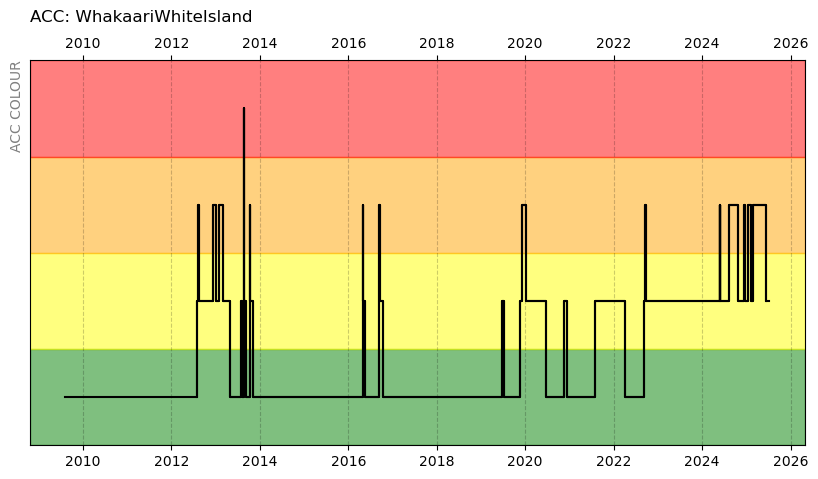

In [9]:
fig,ax = plt.subplots(1,1, figsize=(10,5))

ax.tick_params(labelbottom=True, labeltop=True, labelleft=False, labelright=False,
                     bottom=True, top=True, left=True, right=True)

ax.set_ylim(-0.5,3.5)

#colour acc valies
alpha=0.5
ax.axhspan(-0.5,0.5, color='green', alpha=alpha)
ax.axhspan(0.5,1.5, color='yellow', alpha=alpha)
ax.axhspan(1.5,2.5, color='orange', alpha=alpha)
ax.axhspan(2.5,3.5, color='red', alpha=alpha)

#x-grid
ax.grid(axis='x', linestyle='--', color='black', alpha=0.2)

ax.step(acc['PeriodStart UTC'],acc['ACCnum'], where='post', color='black')
ax.step(acc['PeriodEnd UTC'],acc['ACCnum'], where='pre', color='black')

ax.set_yticks([])
ax.set_ylabel('ACC COLOUR', color='grey', loc='top')
ax.text(0,1.1, 'ACC: '+volcano, fontsize=12, transform=ax.transAxes)